# **REVERSÃO DA DIFERENCIAÇÃO NAS PREVISÕES**

In [1]:
import numpy as np
import pandas as pd

In [2]:
##### Abertura do arquivo de Séries Temporais Air Passengers
dados = pd.read_csv('/content/drive/MyDrive/Cursos_Udemy/series_temporais_PYTHON/AirPassengers.csv',
                    sep=',')

In [3]:
###### Leitura do arquivo Air Passengers
dados

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [6]:
serie = pd.Series(dados['#Passengers'].values, index = dados['Month'])
serie

Month
1949-01    112
1949-02    118
1949-03    132
1949-04    129
1949-05    121
          ... 
1960-08    606
1960-09    508
1960-10    461
1960-11    390
1960-12    432
Length: 144, dtype: int64

**ESTACIONARIDADE**

In [7]:
import matplotlib.pyplot as plt

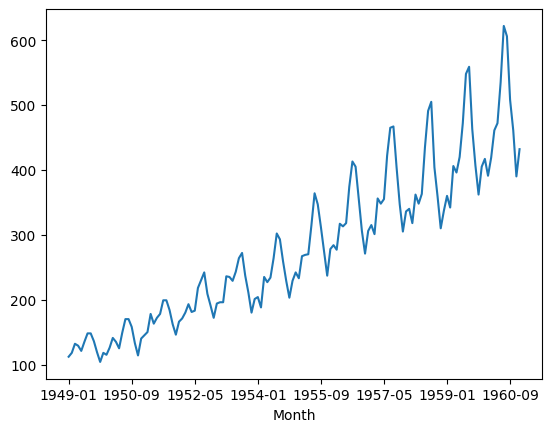

In [8]:
serie.plot()
plt.show()

In [9]:
import statsmodels.tsa.stattools

Teste KPSS (Kwiatkowski-Phillips-Schmidt-Shin)

Ha = não é estacionária:  **estatística do teste > valor crítico**.

Ho = é estacionária: **estatística do teste < valor crítico**


In [10]:
kpss = statsmodels.tsa.stattools.kpss(serie)
print('Estatítica do teste: {:.4f}'.format(kpss[0]))
print('p_valor: {:.4f}'.format(kpss[1]))
print('Valores Críticos:')
for chave, valor in kpss[3].items():
   print('{}: {:.4f}'.format(chave, valor))

Estatítica do teste: 1.6513
p_valor: 0.0100
Valores Críticos:
10%: 0.3470
5%: 0.4630
2.5%: 0.5740
1%: 0.7390


<ipython-input-10-7cfa8415f9a2>:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss = statsmodels.tsa.stattools.kpss(serie)


**DIFERENCIAÇÃO**

In [11]:
serie_diferenciada = serie.diff()
serie_diferenciada

Month
1949-01     NaN
1949-02     6.0
1949-03    14.0
1949-04    -3.0
1949-05    -8.0
           ... 
1960-08   -16.0
1960-09   -98.0
1960-10   -47.0
1960-11   -71.0
1960-12    42.0
Length: 144, dtype: float64

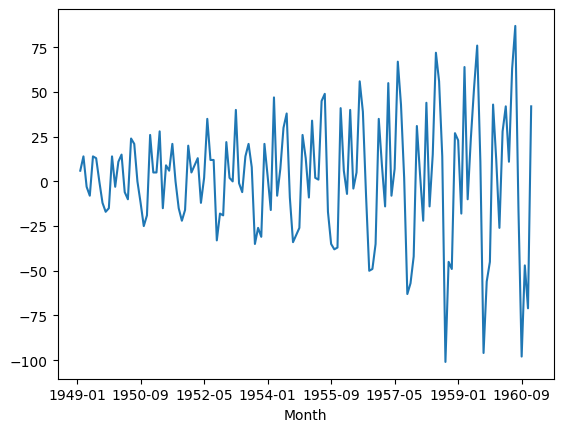

In [12]:
serie_diferenciada.plot()
plt.show()

In [13]:
kpss = statsmodels.tsa.stattools.kpss(serie_diferenciada)
print('Estatítica do teste: {:.4f}'.format(kpss[0]))
print('p_valor: {:.4f}'.format(kpss[1]))
print('Valores Críticos:')
for chave, valor in kpss[3].items():
   print('{}: {:.4f}'.format(chave, valor))

ValueError: cannot convert float NaN to integer

In [14]:
serie_diferenciada = serie_diferenciada.drop(index = serie_diferenciada.index[0])

In [15]:
serie_diferenciada

Month
1949-02     6.0
1949-03    14.0
1949-04    -3.0
1949-05    -8.0
1949-06    14.0
           ... 
1960-08   -16.0
1960-09   -98.0
1960-10   -47.0
1960-11   -71.0
1960-12    42.0
Length: 143, dtype: float64

In [16]:
kpss = statsmodels.tsa.stattools.kpss(serie_diferenciada)
print('Estatítica do teste: {:.4f}'.format(kpss[0]))
print('p_valor: {:.4f}'.format(kpss[1]))
print('Valores Críticos:')
for chave, valor in kpss[3].items():
   print('{}: {:.4f}'.format(chave, valor))

Estatítica do teste: 0.0239
p_valor: 0.1000
Valores Críticos:
10%: 0.3470
5%: 0.4630
2.5%: 0.5740
1%: 0.7390


<ipython-input-16-ea2d104be05a>:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss = statsmodels.tsa.stattools.kpss(serie_diferenciada)


## **REVERSÃO DA DIFERENCIAÇÃO**

**Criando o modelo**

In [17]:
pip install pmdarima

In [18]:
from pmdarima.arima import auto_arima

In [19]:
modelo_auto = auto_arima(serie_diferenciada, trace = True, stepwise = False, seasonal=True, max_p=8, max_q=8,
                          max_P=3, max_Q=3, start_p=0, start_q=0, start_P=0, start_Q=0, m=6)

 ARIMA(0,0,0)(0,0,0)[6] intercept   : AIC=1415.278, Time=0.04 sec
 ARIMA(0,0,0)(0,0,1)[6] intercept   : AIC=1416.929, Time=0.11 sec
 ARIMA(0,0,0)(0,0,2)[6] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,0,0)(0,0,3)[6] intercept   : AIC=inf, Time=2.05 sec
 ARIMA(0,0,0)(1,0,0)[6] intercept   : AIC=1416.265, Time=0.31 sec
 ARIMA(0,0,0)(1,0,1)[6] intercept   : AIC=1360.351, Time=0.44 sec
 ARIMA(0,0,0)(1,0,2)[6] intercept   : AIC=1276.747, Time=1.24 sec
 ARIMA(0,0,0)(1,0,3)[6] intercept   : AIC=1255.056, Time=1.51 sec
 ARIMA(0,0,0)(2,0,0)[6] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,0,0)(2,0,1)[6] intercept   : AIC=1156.674, Time=0.45 sec
 ARIMA(0,0,0)(2,0,2)[6] intercept   : AIC=1156.780, Time=0.53 sec
 ARIMA(0,0,0)(2,0,3)[6] intercept   : AIC=1158.659, Time=1.09 sec
 ARIMA(0,0,0)(3,0,0)[6] intercept   : AIC=inf, Time=0.80 sec
 ARIMA(0,0,0)(3,0,1)[6] intercept   : AIC=1158.464, Time=1.19 sec
 ARIMA(0,0,0)(3,0,2)[6] intercept   : AIC=1158.731, Time=1.07 sec
 ARIMA(0,0,1)(0,0,0)[6] interc

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(2,0,0)(3,0,0)[6] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/mlemodel.py", line 704, in fit
    mlefit = super(MLEModel, self).fit(start_params, method=method,
  File "/usr/local/lib/python3.

 ARIMA(2,0,0)(3,0,0)[6] intercept   : AIC=inf, Time=nan sec
 ARIMA(2,0,1)(0,0,0)[6] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(2,0,1)(0,0,1)[6] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(2,0,1)(0,0,2)[6] intercept   : AIC=inf, Time=1.26 sec
 ARIMA(2,0,1)(1,0,0)[6] intercept   : AIC=1360.311, Time=0.89 sec
 ARIMA(2,0,1)(1,0,1)[6] intercept   : AIC=1289.000, Time=1.29 sec
 ARIMA(2,0,1)(2,0,0)[6] intercept   : AIC=inf, Time=1.53 sec
 ARIMA(2,0,2)(0,0,0)[6] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(2,0,2)(0,0,1)[6] intercept   : AIC=1343.777, Time=0.71 sec
 ARIMA(2,0,2)(1,0,0)[6] intercept   : AIC=1323.716, Time=0.70 sec
 ARIMA(2,0,3)(0,0,0)[6] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(3,0,0)(0,0,0)[6] intercept   : AIC=1396.151, Time=0.14 sec
 ARIMA(3,0,0)(0,0,1)[6] intercept   : AIC=1396.043, Time=0.21 sec
 ARIMA(3,0,0)(0,0,2)[6] intercept   : AIC=1294.529, Time=0.54 sec
 ARIMA(3,0,0)(1,0,0)[6] intercept   : AIC=1389.229, Time=0.39 sec
 ARIMA(3,0,0)(1,0,1)[6] intercept   : AIC=1321

In [20]:
resultado_auto = modelo_auto.fit(serie_diferenciada)
print(resultado_auto.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  143
Model:             SARIMAX(0, 0, 1)x(2, 0, [], 6)   Log Likelihood                -568.886
Date:                            Mon, 19 Feb 2024   AIC                           1147.773
Time:                                    14:44:42   BIC                           1162.587
Sample:                                02-01-1949   HQIC                          1153.793
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0835      0.632      0.132      0.895      -1.156       1.323
ma.L1         -0.2671      0.072   

In [21]:
previsao_auto = resultado_auto.predict(n_periods=24)
previsao_auto

1961-01-01    12.329102
1961-02-01   -24.659991
1961-03-01    27.797703
1961-04-01    40.728523
1961-05-01    11.272266
1961-06-01    60.008967
1961-07-01    83.260756
1961-08-01   -15.006045
1961-09-01   -93.996540
1961-10-01   -45.290290
1961-11-01   -67.994396
1961-12-01    39.737320
1962-01-01    11.115825
1962-02-01   -23.386310
1962-03-01    27.566947
1962-04-01    39.495408
1962-05-01    11.505085
1962-06-01    57.166392
1962-07-01    79.692143
1962-08-01   -14.066257
1962-09-01   -90.161598
1962-10-01   -43.642038
1962-11-01   -65.119068
1962-12-01    37.597421
Freq: MS, dtype: float64

**Reversão**

In [22]:
# Usando o último elemento da série não diferenciada e somando com o primeiro elemento da previsão
s = serie[len(serie)-1]+previsao_auto[0]
s

444.3291022848762

In [23]:
c = 1   # contador
previsao_revertida = [s]   # lista para incluir resultados da previsão revertida
while c < len(previsao_auto): #contagem irá de 1 até uma unidade menor que a quantidade total de previsões
    s = s + previsao_auto[c]  #somando o último valor de s com o próximo valor da previsão
    previsao_revertida.append(s)        #incluindo resultados na lista da previsão revertida
    c = c + 1

In [24]:
previsao_revertida = pd.DataFrame(previsao_revertida)
previsao_revertida

,0
0,444.329102
1,419.669111
2,447.466814
3,488.195337
4,499.467603
5,559.476571
6,642.737327
7,627.731282
8,533.734742
9,488.444452


In [27]:
seriecomprevisao = pd.concat([serie, previsao_revertida], axis=0,ignore_index=True)
seriecomprevisao

,0
0,112.000000
1,118.000000
2,132.000000
3,129.000000
4,121.000000
...,...
163,649.276612
164,559.115014
165,515.472976
166,450.353907


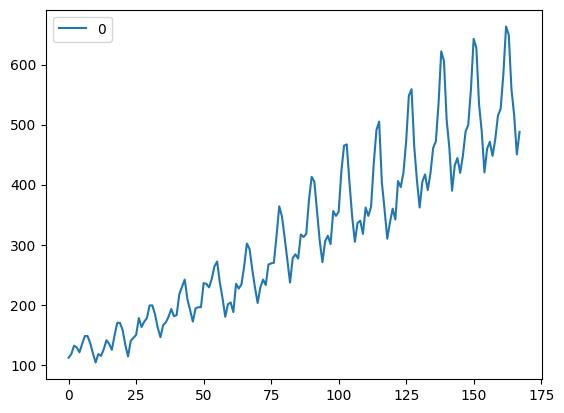

In [28]:
seriecomprevisao.plot()
plt.show()

In [30]:
previsao_revertida.index = range(144, len(previsao_revertida) + 144)
previsao_revertida

,0
144,444.329102
145,419.669111
146,447.466814
147,488.195337
148,499.467603
149,559.476571
150,642.737327
151,627.731282
152,533.734742
153,488.444452


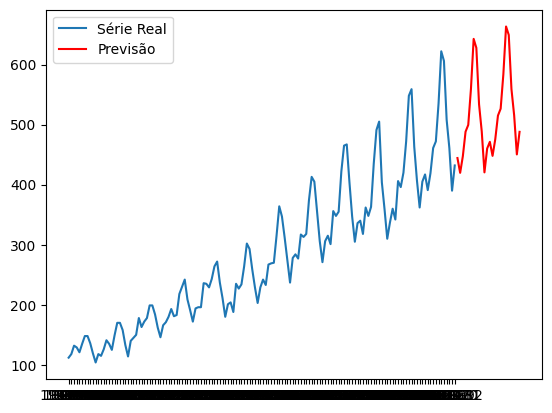

In [31]:
plt.plot(serie, label='Série Real')
plt.plot(previsao_revertida,color='red', label='Previsão')
plt.legend(loc='best')
plt.show()

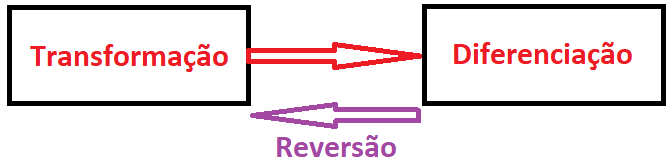